In [18]:
import lab_tools
import pandas as pd
import os 
import pickle
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import uncertainties as unc
import logging
import copy
from uncertainties import unumpy
import plotly.express as px

In [14]:
def uplot(x_ufloats, y_ufloats):
    plt.errorbar( unumpy.nominal_values(x_ufloats), unumpy.nominal_values(y_ufloats),  xerr=unumpy.std_devs(x_ufloats), yerr= unumpy.std_devs(y_ufloats), fmt='o')  
# constants
R = unc.ufloat(19, 0.1)
N = unc.ufloat(50, 1)


In [2]:
termo_dict = lab_tools.load_pickle('termo')
# termo_dict['freq'] = 507517 # hz

In [46]:
amplitudes = lab_tools.find_amp(termo_dict)
damy_amp = np.ones(amplitudes.shape)
p = termo_dict['97']

In [41]:
def find_zeros(x, y):
    return x[y == 0]

def find_phase_diff(df, w):
    p_0 = lab_tools.findzeros(df['t'], df['x'])[0][0]
    p_1 = lab_tools.findzeros(df['t'], df['y'])[0][0]
    # p_0 = find_zeros(np.array(df['t']), np.array(df['x']))[0]
    # p_1 = find_zeros(np.array(df['t']), np.array(df['y']))[0]

    delta_p = w * (p_1 - p_0)
    return delta_p

phases = []
temps = []

for k,df in termo_dict.items():
    val = find_phase_diff(df, lab_tools.Constants.Termo.f_in)
    print(val)
    phases.append(val)
    temps.append(float(k))

px.scatter(x=temps, y=phases)

0.6597715823326593
0.619170653722109
0.10150324774489998
0.15225441485204852
0.09135301939863984
0.09135301939863984
0.10150324774489998
0.09135301939863984
0.11165348116633003
0.08120278597720978
0.13195394800919014
0.21315673398639992
0.10150324774489998
0.6800720491755194
2.740591434587759
3.2278081606013593
0.7308241348884391
0.7003734396993188
2.720290957594559
0.7105236731207488
0.11165348116633003
0.12180371458776008
0.20300650056496988
0.6496213539863992
0.09135301939863984
0.09135301939863984
0.09135301939863984
0.12180371458776008
0.09135301939863984


In [ ]:
import logging
logging.basicConfig(level=logging.WARNING)

phases = []
frequencies = []
amplitudes = []
faild_fits = {}

def find_phase(w,a1,p1,c1,a2,p2,c2):
    f = 2 * np.pi / w
    return f * np.abs(p1 - p2)

def find_z(w,a1,p1,c1,a2,p2,c2):
    return a2 / a1

funcs = {'phase': find_phase, 'z': find_z}
limits = {'z': [0, 10000]}


for freq, df in copy.deepcopy(termo_dict).items():
    float_freq = float(freq)
    logging.info(f"frequency is {freq}")
    result = lab_tools.extract_data_from_fit(funcs, df, lab_tools.Constants.Termo.f_in, display=False)

    if result:
        frequencies.append(float(freq))
        phases.append(result['phase'])
        amplitudes.append(result['z'])

    else:
        faild_fits[freq] = df
        del termo_dict[freq]

In [45]:
from scipy.constants import mu_0 as mu_0
amplitudes = damy_amp
R_effective = []
L_effective = []

for index in range(len(amplitudes)):
    R_effective.append(amplitudes[index]*np.cos(phases[index]) - R)
    L_effective.append(amplitudes[index]*np.sin(phases[index])/(2*np.pi))

Real_mu = []
Im_mu = []

# for index in range(len(R_effective)):
#     Real_mu.append(np.abs(R_effective[index]/(mu_0*frequencies[index]*(lab_tools.Constants.N**2))))
#     Im_mu.append(L_effective[index]/(mu_0*frequencies[index]*(N**2)))



NameError: name 'R' is not defined

In [13]:
path ="/Users/user/Documents/semster_c/courses/lab/magnetisem/extension2/termo/balanced"
d = lab_tools.read_to_dict(path)
termo_df = lab_tools.find_amp(d)
termo_df = termo_df.drop(4)
termo_df = termo_df.drop(12)
termo_df

,temperature,amplitude
0,-97.0,6.650000
1,-90.5,9.975000
2,-61.8,47.879999
3,-94.0,7.600000
5,-76.5,19.949999
6,-56.5,60.799999
7,-47.0,79.799998
8,-94.5,21.763636
9,-39.9,79.799998
10,-70.5,27.022222


In [ ]:
z = lab_tools.findzeros(p[t], p[x])
z

In [24]:
find_phase_diff(p)

([2.36800006e-05, 0.0], [-1.0399995e-06, 0.0])
([2.497999958e-05, 0.0], [-1.99995203e-08, 0.0])


1.2999989799999987e-06

In [38]:
d = find_zeros(np.array(df['t']), np.array(df['x']))
d

array([-2.47600001e-05, -2.27799992e-05, -2.08000001e-05, -1.97999998e-05,
       -1.78199989e-05, -1.58399998e-05, -1.28999991e-05, -1.09199991e-05,
       -7.93999971e-06, -5.95999927e-06, -3.01999944e-06, -1.03999950e-06,
        1.94000040e-06,  3.92000038e-06,  8.84000019e-06,  1.08200002e-05,
        1.18200005e-05,  1.38000005e-05,  1.57800005e-05,  1.87200003e-05,
        2.07000012e-05,  2.36800006e-05])

In [25]:
p = termo_dict['97']
p.hvplot.scatter(x='t')


:NdOverlay   [Variable]
   :Scatter   [t]   (value)

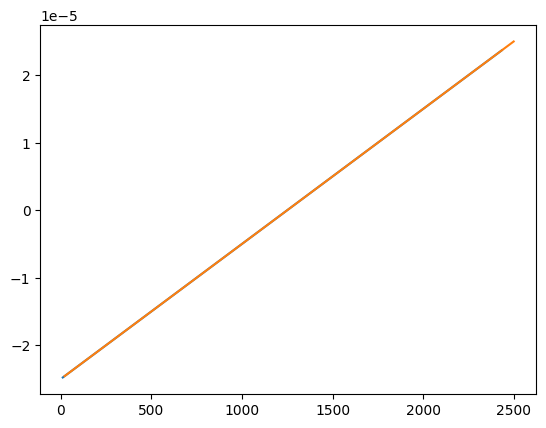

In [31]:
def find_zeros(x, y):
    return x[y == 0]
    


plt.plot(find_zeros(p['t'], p['x']))
plt.plot(find_zeros(p['t'], p['y']))
